In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime
from sqlalchemy import create_engine
from sqlalchemy import Column, Float, String, Integer
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, sessionmaker

# Analyse exploratoire
from pandas.plotting import scatter_matrix

# Régréssion linéaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Régression linéaire univariée, multivarié
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Régression linéaire polynomiale
from sklearn.preprocessing import PolynomialFeatures
from sqlalchemy.sql.sqltypes import Float, INTEGER, Integer, SMALLINT, SmallInteger

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

ada_data = pd.read_csv(
    "/home/simplon/tclabs/ADAUSDT.csv"
)
ada_data.head()

,Unnamed: 0,open_time,asset,open_price,intraday_high_price,intraday_low_price,close_price,24h_volume,close_time,number_trades
0,0,2021-05-01 00:00:00.000,ADAUSDT,1.3530,1.3532,1.3498,1.3498,237805.39,2021-05-01 00:00:59.999,579
1,1,2021-05-01 00:01:00.000,ADAUSDT,1.3497,1.3500,1.3468,1.3482,239690.38,2021-05-01 00:01:59.999,446
2,2,2021-05-01 00:02:00.000,ADAUSDT,1.3485,1.3550,1.3483,1.3548,716889.90,2021-05-01 00:02:59.999,758
3,3,2021-05-01 00:03:00.000,ADAUSDT,1.3549,1.3550,1.3513,1.3525,162360.14,2021-05-01 00:03:59.999,337
4,4,2021-05-01 00:04:00.000,ADAUSDT,1.3524,1.3549,1.3519,1.3522,154154.34,2021-05-01 00:04:59.999,327


In [6]:
ada_data.count()

Unnamed: 0             44640
open_time              44640
asset                  44640
open_price             44640
intraday_high_price    44640
intraday_low_price     44640
close_price            44640
24h_volume             44640
close_time             44640
number_trades          44640
dtype: int64

In [25]:
ada_data.isna().sum()
ada_data.duplicated().sum()

0

<Figure size 432x288 with 0 Axes>

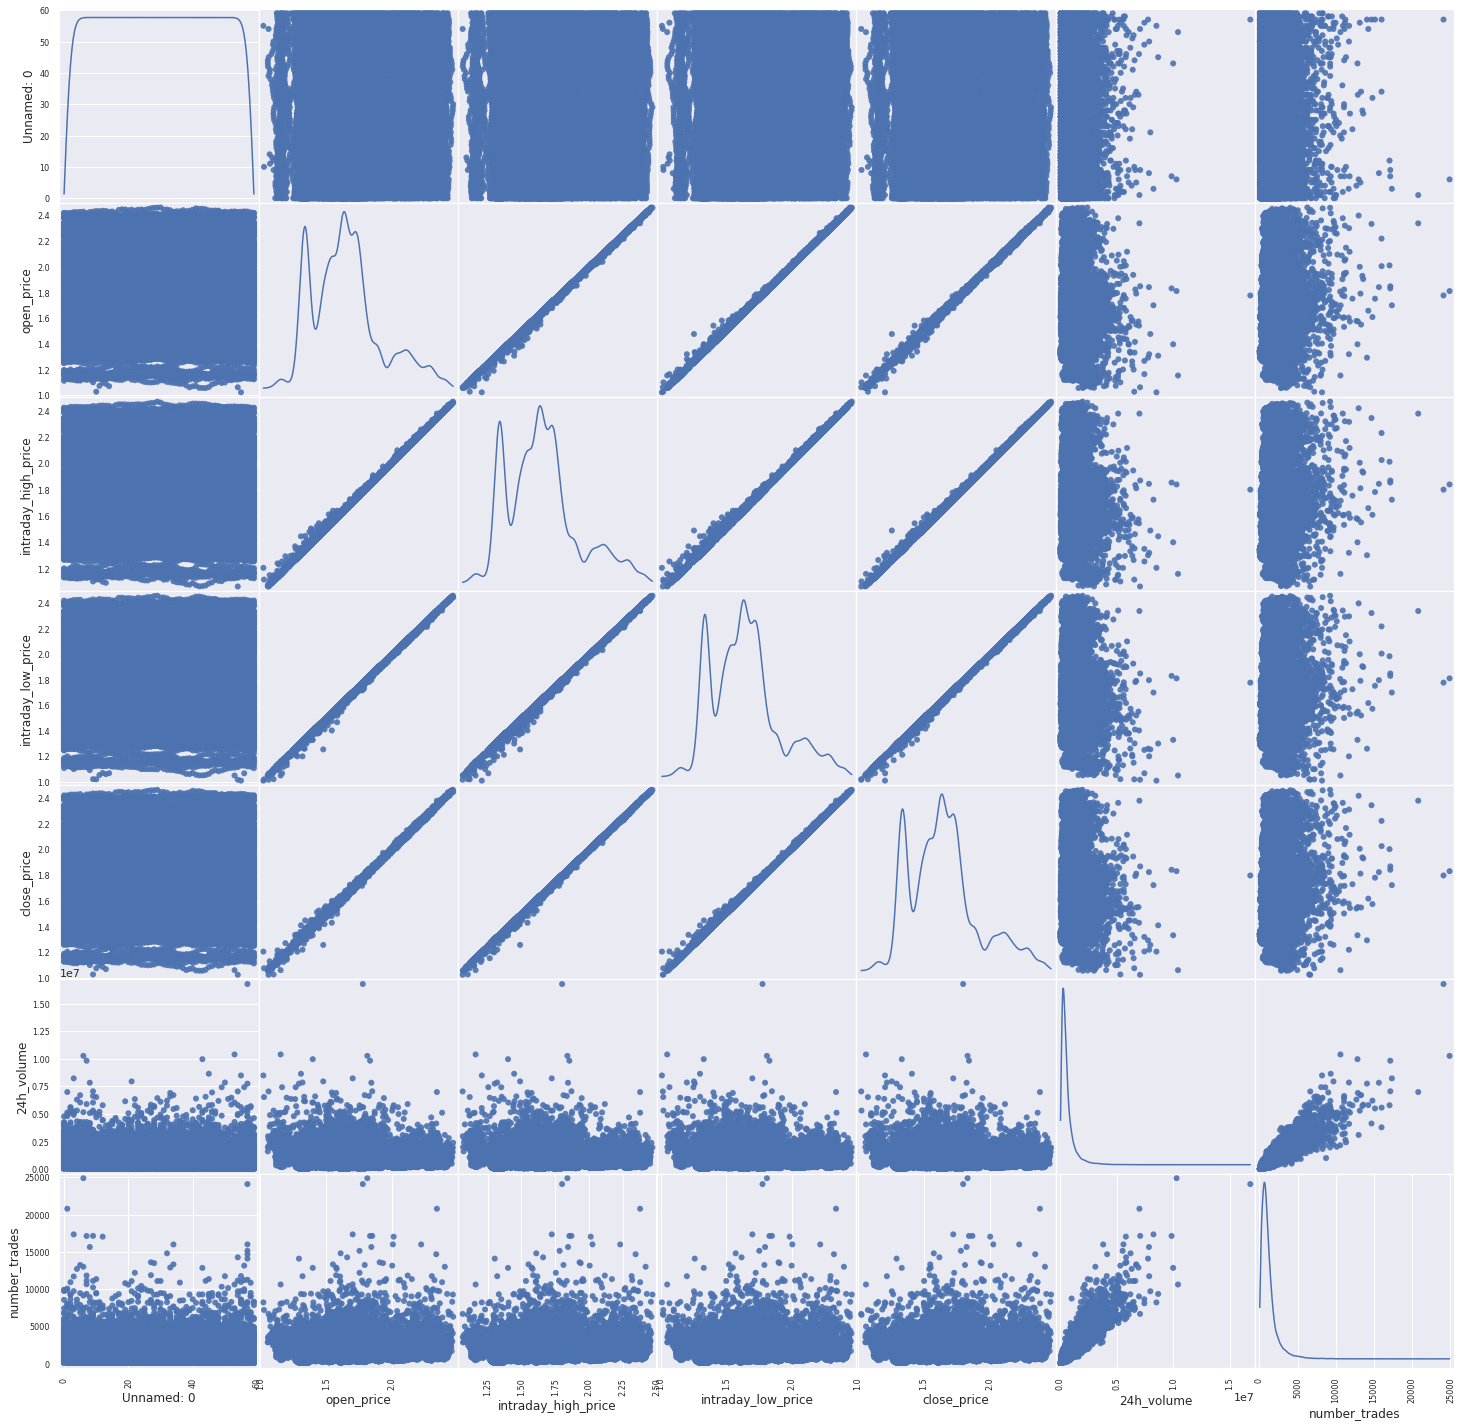

In [31]:
fig = plt.figure()
scatter_matrix(ada_data,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

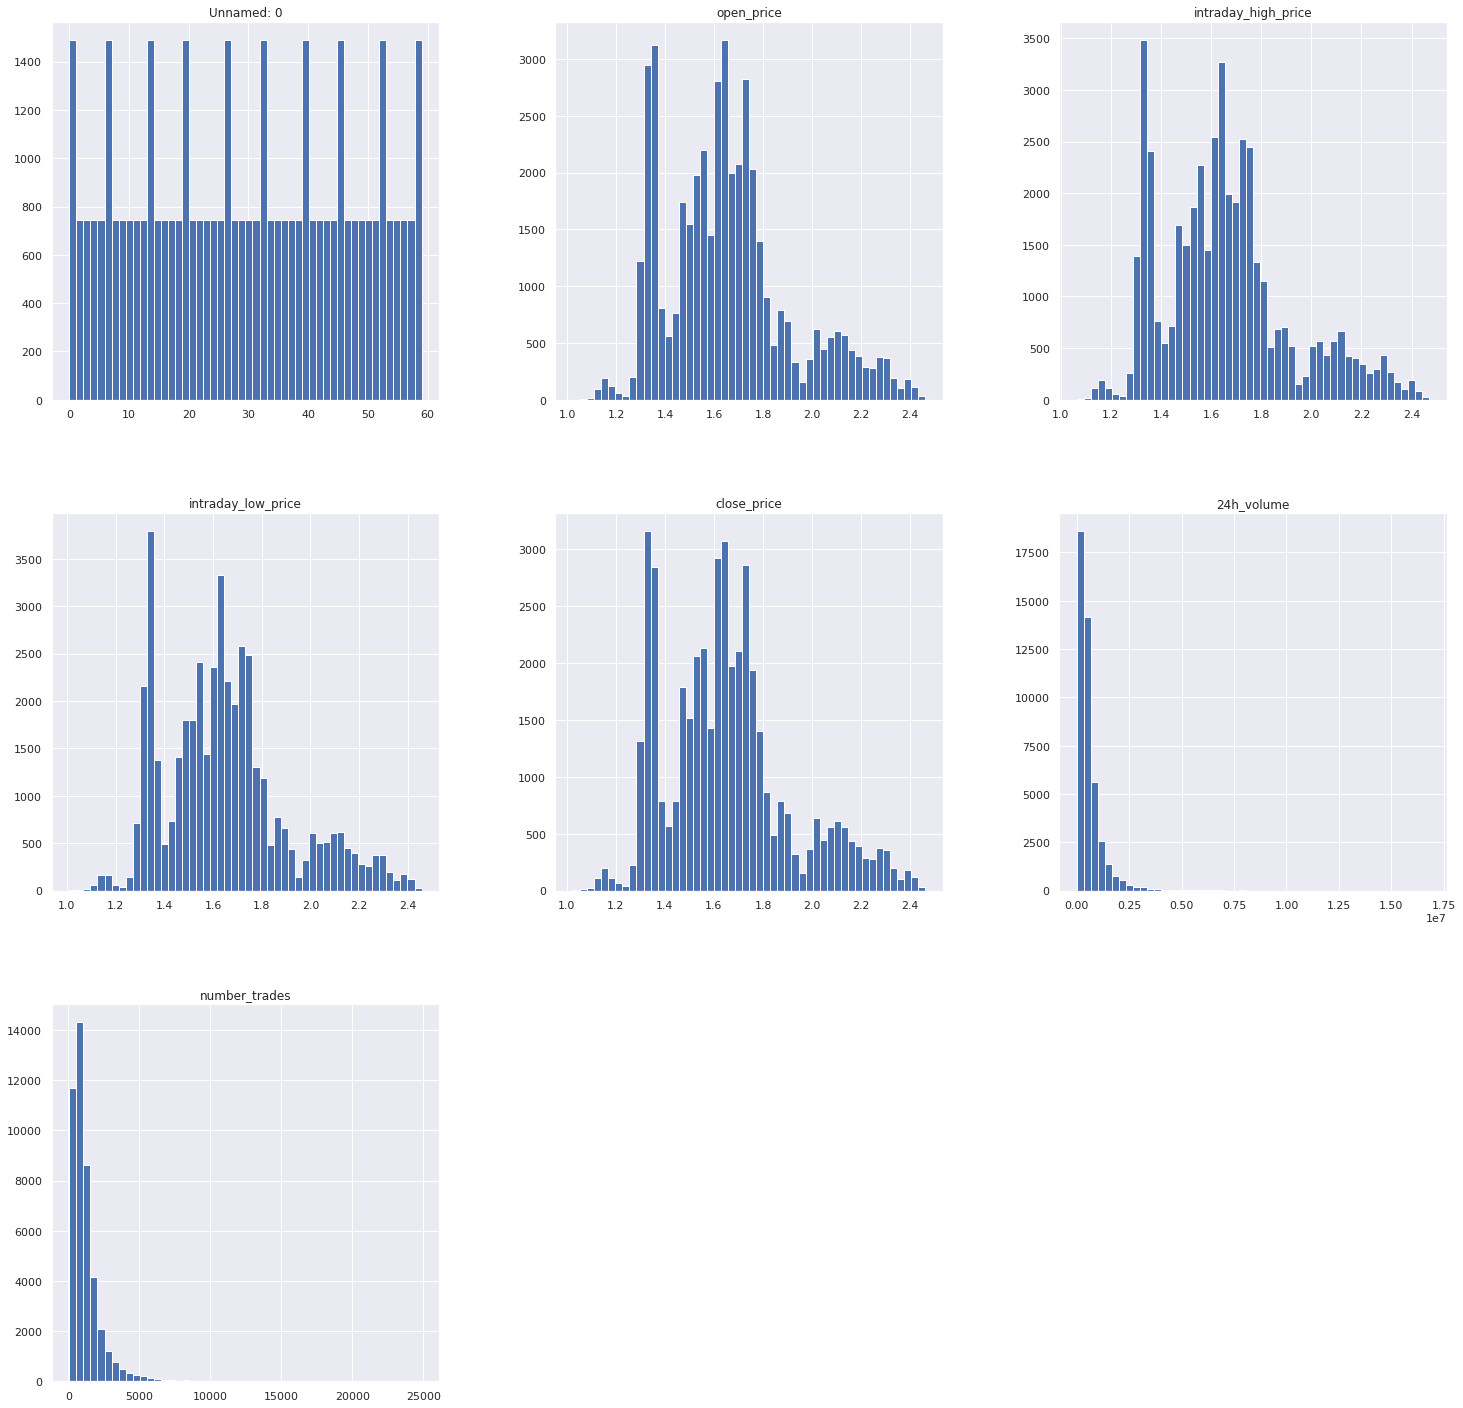

In [35]:
ada_data.hist(figsize=(25,25),bins=50);

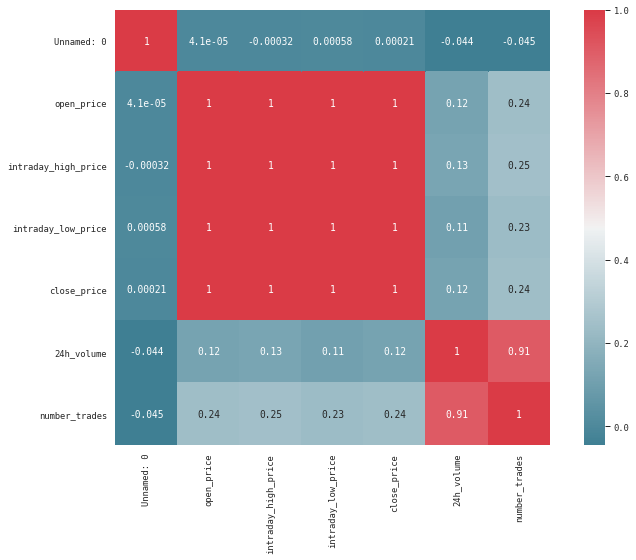

In [36]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
ada_corr_matrix = ada_data.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(ada_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

In [74]:
tail_data = ada_data.tail(500)
tail_data

,Unnamed: 0,open_time,asset,open_price,intraday_high_price,intraday_low_price,close_price,24h_volume,close_time,number_trades,time
44140,40,2021-05-31 15:40:00.000,ADAUSDT,1.6645,1.6679,1.6627,1.6634,320735.62,2021-05-31 15:40:59.999,612,202105311540
44141,41,2021-05-31 15:41:00.000,ADAUSDT,1.6634,1.6634,1.6585,1.6625,493649.00,2021-05-31 15:41:59.999,1002,202105311541
44142,42,2021-05-31 15:42:00.000,ADAUSDT,1.6623,1.6666,1.6622,1.6637,360306.38,2021-05-31 15:42:59.999,751,202105311542
44143,43,2021-05-31 15:43:00.000,ADAUSDT,1.6637,1.6653,1.6628,1.6632,191825.88,2021-05-31 15:43:59.999,615,202105311543
44144,44,2021-05-31 15:44:00.000,ADAUSDT,1.6632,1.6653,1.6628,1.6640,148223.25,2021-05-31 15:44:59.999,568,202105311544
...,...,...,...,...,...,...,...,...,...,...,...
44635,55,2021-05-31 23:55:00.000,ADAUSDT,1.7418,1.7456,1.7410,1.7430,241304.70,2021-05-31 23:55:59.999,499,202105312355
44636,56,2021-05-31 23:56:00.000,ADAUSDT,1.7429,1.7439,1.7410,1.7411,176632.23,2021-05-31 23:56:59.999,421,202105312356
44637,57,2021-05-31 23:57:00.000,ADAUSDT,1.7410,1.7435,1.7386,1.7392,339596.20,2021-05-31 23:57:59.999,729,202105312357
44638,58,2021-05-31 23:58:00.000,ADAUSDT,1.7392,1.7429,1.7382,1.7405,209634.95,2021-05-31 23:58:59.999,496,202105312358


In [61]:
d = ada_data["open_time"][0]
print(d)

def to_integer(str_time):
    return 10000*int(str_time[:4]) + 100*int(str_time[5:7]) + int(str_time[8:10])
    # Or take the appropriate chars from a string date representation

def to_int_hm(str):
    return int(str[:2])*100+int(str[3:5])

def date_to_int(str):
    return to_integer(str)*10000+to_int_hm(str[11:])

# print(to_integer(d))
# print(date_to_int(d))
ada_data['time'] = ada_data['open_time'].apply(date_to_int)
ada_data.head()

2021-05-01 00:00:00.000


,Unnamed: 0,open_time,asset,open_price,intraday_high_price,intraday_low_price,close_price,24h_volume,close_time,number_trades,time
0,0,2021-05-01 00:00:00.000,ADAUSDT,1.3530,1.3532,1.3498,1.3498,237805.39,2021-05-01 00:00:59.999,579,202105010000
1,1,2021-05-01 00:01:00.000,ADAUSDT,1.3497,1.3500,1.3468,1.3482,239690.38,2021-05-01 00:01:59.999,446,202105010001
2,2,2021-05-01 00:02:00.000,ADAUSDT,1.3485,1.3550,1.3483,1.3548,716889.90,2021-05-01 00:02:59.999,758,202105010002
3,3,2021-05-01 00:03:00.000,ADAUSDT,1.3549,1.3550,1.3513,1.3525,162360.14,2021-05-01 00:03:59.999,337,202105010003
4,4,2021-05-01 00:04:00.000,ADAUSDT,1.3524,1.3549,1.3519,1.3522,154154.34,2021-05-01 00:04:59.999,327,202105010004


In [90]:
ada_data.sort_values("intraday_high_price", ascending=False)[:1]

,Unnamed: 0,open_time,asset,open_price,intraday_high_price,intraday_low_price,close_price,24h_volume,close_time,number_trades,time
22049,29,2021-05-16 07:29:00.000,ADAUSDT,2.4589,2.47,2.4564,2.4614,1961255.0,2021-05-16 07:29:59.999,9256,202105160729


In [93]:
ada_data["intraday_high_price"]

0        1.3532
1        1.3500
2        1.3550
3        1.3550
4        1.3549
          ...  
44635    1.7456
44636    1.7439
44637    1.7435
44638    1.7429
44639    1.7414
Name: intraday_high_price, Length: 44640, dtype: float64

<AxesSubplot:title={'center':'Nombre de trades par jour'}, xlabel='number_trades', ylabel='count'>

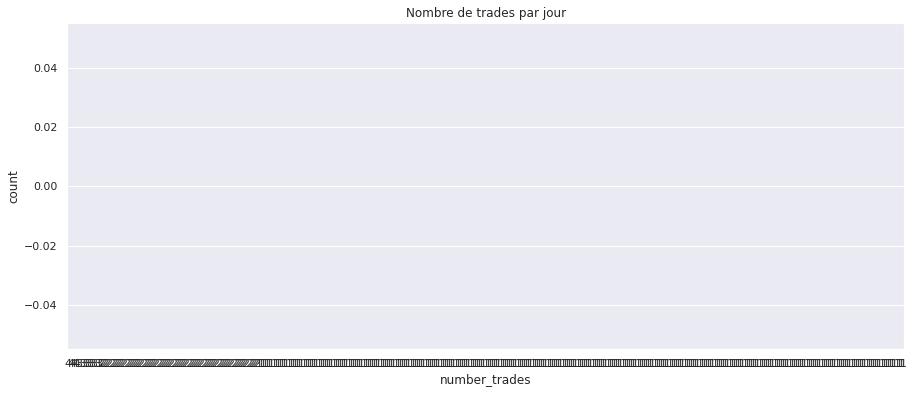

In [77]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

Text(0.5, 1.0, 'Nombre de trades')

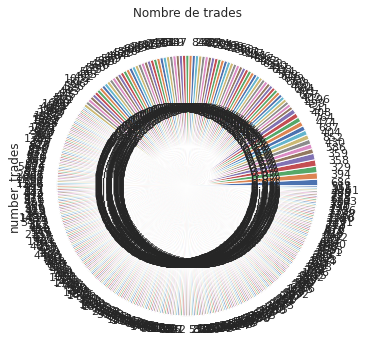

In [75]:
plt.figure(figsize= [15, 6])
tail_data["number_trades"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Nombre de trades")

,Unnamed: 0,open_time,asset,open_price,intraday_high_price,intraday_low_price,close_price,24h_volume,close_time,number_trades,time
43640,20,2021-05-31 07:20:00.000,ADAUSDT,1.6091,1.6110,1.6032,1.6066,660233.80,2021-05-31 07:20:59.999,991,202105310720
43641,21,2021-05-31 07:21:00.000,ADAUSDT,1.6068,1.6109,1.6042,1.6082,651201.20,2021-05-31 07:21:59.999,1014,202105310721
43642,22,2021-05-31 07:22:00.000,ADAUSDT,1.6084,1.6112,1.6063,1.6083,1011142.30,2021-05-31 07:22:59.999,1161,202105310722
43643,23,2021-05-31 07:23:00.000,ADAUSDT,1.6078,1.6121,1.6077,1.6095,561573.40,2021-05-31 07:23:59.999,1006,202105310723
43644,24,2021-05-31 07:24:00.000,ADAUSDT,1.6095,1.6144,1.6094,1.6142,522506.00,2021-05-31 07:24:59.999,889,202105310724
...,...,...,...,...,...,...,...,...,...,...,...
44635,55,2021-05-31 23:55:00.000,ADAUSDT,1.7418,1.7456,1.7410,1.7430,241304.70,2021-05-31 23:55:59.999,499,202105312355
44636,56,2021-05-31 23:56:00.000,ADAUSDT,1.7429,1.7439,1.7410,1.7411,176632.23,2021-05-31 23:56:59.999,421,202105312356
44637,57,2021-05-31 23:57:00.000,ADAUSDT,1.7410,1.7435,1.7386,1.7392,339596.20,2021-05-31 23:57:59.999,729,202105312357
44638,58,2021-05-31 23:58:00.000,ADAUSDT,1.7392,1.7429,1.7382,1.7405,209634.95,2021-05-31 23:58:59.999,496,202105312358
